# Part I - (fordgobike-tripdata)
## by (Manahil Siddiqui)

## Introduction
In this project, I will explore the Ford GoBike System dataset with 183412 rides recorded. This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling

In [41]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## DATA GATHERING

In [42]:
#load data set
df=pd.read_csv('201902-fordgobike-tripdata.csv')

#get the first 5 rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## ASSESSING DATA

In [43]:
df.tail(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183402,122,2019-02-01 00:17:32.2580,2019-02-01 00:19:34.9380,119.0,18th St at Noe St,37.761047,-122.432642,120.0,Mission Dolores Park,37.761420,-122.426435,4326,Subscriber,NaN,NaN,No
183403,249,2019-02-01 00:15:12.0670,2019-02-01 00:19:21.6990,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4642,Subscriber,2000.0,Male,No
183404,256,2019-02-01 00:12:50.5540,2019-02-01 00:17:07.3620,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4845,Subscriber,1980.0,Male,Yes
183405,111,2019-02-01 00:14:49.8740,2019-02-01 00:16:41.3010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,-122.403452,4832,Subscriber,1984.0,Male,No
183406,706,2019-02-01 00:04:40.6160,2019-02-01 00:16:27.0800,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988.0,Male,No
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [45]:
df.shape

(183412, 16)

In [46]:
## Calculate and print the total unique value count for each column

total_unique_counts = df.nunique()
print(total_unique_counts)

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64


In [47]:
#Get the idex of df
df.index


RangeIndex(start=0, stop=183412, step=1)

In [48]:
#check duplicated
df.duplicated().sum()


0

In [49]:
# Check completeness and count missing values in each column
missing_values = df.isnull().sum()

# Display missing values counts for each column
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


In [50]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [51]:
#Get summary statistics of dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [52]:
#check the data validation
def check_data_validity(df):
    """
    Check the validity of each column in a DataFrame.
    
    Parameters:
    - df (pandas.DataFrame): The DataFrame to be checked.
    
    Returns:
    - has_issues (bool): True if validation issues are found, False otherwise.
    - issues (dict): A dictionary containing information about validation issues found.
    
    Notes:
    - For numerical columns, the function checks for NaN (Not-a-Number) values.
    - For date columns, it checks if values are valid dates.
    - For categorical columns, it checks if values are in a predefined set of valid categories.
    - For other columns, it checks for valid data types.
    """
    has_issues = False
    issues = {}
    
    for col in df.columns:
        # Handle numerical columns (e.g., age)
        if np.issubdtype(df[col].dtype, np.number):
            # Check for NaN values
            if df[col].isnull().any():
                has_issues = True
                issues[col] = f"NaN values found in {col}."
        
        # Handle date columns (e.g., start_time, end_time)
        elif np.issubdtype(df[col].dtype, np.datetime64):
            # Check if values are valid dates (NaT represents invalid dates)
            if pd.to_datetime(df[col], errors='coerce').isnull().any():
                has_issues = True
                issues[col] = f"Invalid dates found in {col}."
        
        # Handle categorical columns (e.g., user_type, member_gender)
        elif df[col].dtype == 'category':
            # Define a set of valid categories for each column
            valid_categories = set(df[col].cat.categories)
            
            # Identify values not in the valid set
            invalid_categories = df[~df[col].isin(valid_categories)]
            
            if not invalid_categories.empty:
                has_issues = True
                issues[col] = f"Invalid categories found in {col}."
        
        # Handle other columns (e.g., bike_id)
        else:
            # Check for valid data types (e.g., integers, strings)
            valid_data_types = [int, str]
            if not df[col].apply(lambda x: type(x) in valid_data_types).all():
                has_issues = True
                issues[col] = f"Invalid data types found in {col}."
    
    return has_issues, issues

# Example usage:
# has_validation_issues, validation_issues = check_data_validity(df)
has_issues, validation_issues = check_data_validity(df)

if has_issues:
    print("Validation issues found:")
    for col, issue in validation_issues.items():
        print(f"- {issue}")
else:
    print("No validation issues found.")


Validation issues found:
- NaN values found in start_station_id.
- Invalid data types found in start_station_name.
- NaN values found in end_station_id.
- Invalid data types found in end_station_name.
- NaN values found in member_birth_year.
- Invalid data types found in member_gender.


### What is the structure of your dataset?

>our dataset orginally consists of 183,412 row (records) and 16 columns and Most variables are numeric and concerns three major things as follow:

> Trip (duration_sec, start_time, end_time)
station (start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude)
User (bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)
After adjustment and cleaning process new columns were created to help in analyzing and expolring the data so, our dataset consists of 21 columns now and the new columns as follow:

> Trip (duration_min, start_date, Trip_day of the week, Trip_hour of the day)
User (member_age)

### What is/are the main feature(s) of interest in your dataset?

> the relation between the time of the trip (Trip_day of the week, Trip_hour of the day) and the number of trips
the relation between the user_type and the number of trips
the relation between the user_type and the the trip duration
the relation between the user_age and the number of trips
the relation between the member_gender and the number of trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the trip duration and start time along with user info such as user type and member gender will show us through analysis if there is a direct relation between them that will give us insights to improve the business.

## Data Issues :
1)  The duration_sec feature is difficult to interpret. It would be easier if it were in minutes

2)  no columns for week, age and months

3) The user_type, member_gender, bike_share_for_all_trip columns are in string format but should be represented as categorical features.

4) There are 8265 records missing the member_gender and member_birth_year attributes.

5) There are 197 rows in the dataset missing the station_id and station_name attributes. Upon further probing, the 197 rows missing station ids and names are due to 17 stations in the North San Jose Area that do not have names and ids to identify them.

6) Outliers in the member_birth_year
7) The member_birth_year and [start/end]station_id are represented in the wrong format ie as floats instead of integers (due to missing values)


## CLEANING DATA

In [53]:
#Make copy of the original data set
copied_data = df.copy()

In [54]:
copied_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [55]:
miss_val = copied_data.isna().sum()
print(miss_val)

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


In [56]:


# Drop rows containing null values in the entire DataFrame
copied_data.dropna(inplace=True)



In [57]:
copied_data.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [58]:
#CHANGE THE DATATYPES
copied_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [59]:
copied_data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [60]:

# Convert 'start_time' and 'end_time' to datetime
copied_data['start_time'] = pd.to_datetime(copied_data['start_time'])
copied_data['end_time'] = pd.to_datetime(copied_data['end_time'])

# Change 'member_birth_year' to integer (assuming no fractions of years)
copied_data['member_birth_year'] = copied_data['member_birth_year'].astype(int)


In [61]:
# Convert the 'user_type' column to the 'category' data type
copied_data['user_type'] = copied_data['user_type'].astype('category')

# Convert the 'member_gender' column to the 'category' data type
copied_data['member_gender'] = copied_data['member_gender'].astype('category')

# Convert the 'bike_share_for_all_trip' column to the 'category' data type
copied_data['bike_share_for_all_trip'] = copied_data['bike_share_for_all_trip'].astype('category')

In [62]:
copied_data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip          category
dtype: object

In [63]:
copied_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [64]:
# Calculate the trip duration in minutes by dividing duration in seconds by 60

copied_data['duration_min'] = copied_data['duration_sec']/60

# Drop the 'duration_sec' column as we have already calculated duration in minutes

copied_data = copied_data.drop(columns=['duration_sec'])

In [65]:
# Convert 'start_station_id' and 'end_station_id' to integers
copied_data['start_station_id'] = copied_data['start_station_id'].astype(int)
copied_data['end_station_id'] = copied_data['end_station_id'].astype(int)


In [66]:
# Create a boolean mask where start_time > end_time
mask = copied_data['start_time'] > copied_data['end_time']

# Select rows where start_time > end_time
trips_with_invalid_times = copied_data[mask]

# Check if there are any trips with invalid times
if not trips_with_invalid_times.empty:
    print("Yes, there are trips where start time is greater than end time.")
else:
    print("No, there are no trips where start time is greater than end time.")


No, there are no trips where start time is greater than end time.


In [67]:
#creating user_age column
copied_data['user_age']= 2019- copied_data['member_birth_year'] 
copied_data['user_age'].tail(10)

183401    28
183403    19
183404    39
183405    35
183406    31
183407    23
183408    35
183409    29
183410    31
183411    30
Name: user_age, dtype: int64

In [68]:
copied_data['start_date']= copied_data.start_time.dt.strftime("%m/%d/%y")
copied_data['Trip_day of the week'] = copied_data.start_time.dt.strftime('%A')
copied_data['Trip_hour of the day'] =copied_data.start_time.dt.strftime('%H')

In [69]:
copied_data.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,user_age,start_date,Trip_day of the week,Trip_hour of the day
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.750000,35,02/28/19,Thursday,17
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.900000,47,02/28/19,Thursday,12
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.166667,30,02/28/19,Thursday,17
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.416667,45,02/28/19,Thursday,23
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.883333,60,02/28/19,Thursday,23


## I HAVE DONE ASSESSING AND CLEANING THE DATA

# UNIVARIATE PLOT

## Question. "How does the number of trips taken by each user type (subscriber and customer) compare in the dataset?"

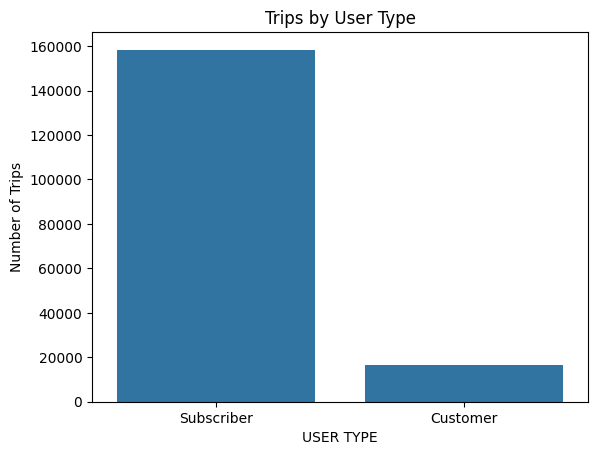

In [70]:
# Extract the order of user types based on their count in the dataset
order = copied_data['user_type'].value_counts().index

# Create a countplot to visualize the number of trips by user type
sns.countplot(data=copied_data, x='user_type', color='tab:blue', order=order)

# Label the x-axis
plt.xlabel('USER TYPE')

# Label the y-axis
plt.ylabel('Number of Trips')

# Set the title for the plot
plt.title('Trips by User Type')


# Display the plot
plt.show()



it means that there are approximately 12,000 trips taken by subscribers in this dataset. Similarly, "customer" bar is less than 2,000, it means that there are fewer than 2,000 trips taken by customers.

## Question: "How does the number of bike-sharing trips vary across different genders of members in the dataset?"

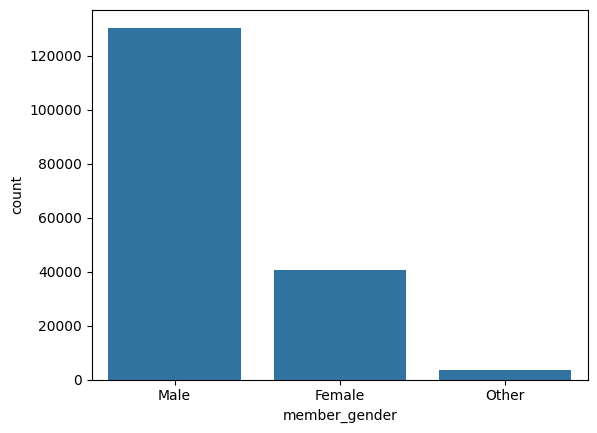

In [71]:
#Exploring member_gender variable in terms of number of trips

sns.countplot(data= copied_data,x='member_gender', color= 'tab:blue',order= copied_data['member_gender'].value_counts().index);


We notice that Most users are Subscribers and Dominant gender is Male



## Question: "What is the distribution of trip durations (in minutes) among bike-sharing trips, and how does it relate to the number of trips?"

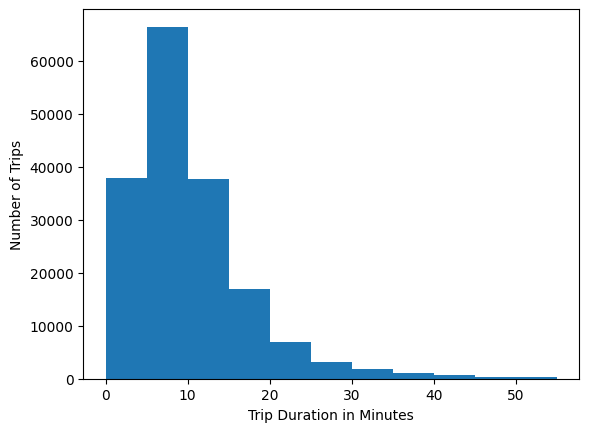

In [72]:
# Exploring trip duration variable in terms of the number of trips

# Define the bins for the histogram, ranging from 0 to 60 minutes with 5-minute intervals
bins = np.arange(0, 60, 5)

# Create a histogram to visualize the distribution of trip durations
plt.hist(data=copied_data, x='duration_min', bins=bins)

# Label the x-axis
plt.xlabel('Trip Duration in Minutes')

# Label the y-axis
plt.ylabel('Number of Trips')

# Display the histogram
plt.show()


We will notice that most of trips are taking less than 15 mins and the top number of the trips takes about 10 mins.

## Question: "What is the distribution of bike trips across different days of the week in the bike-sharing dataset?"



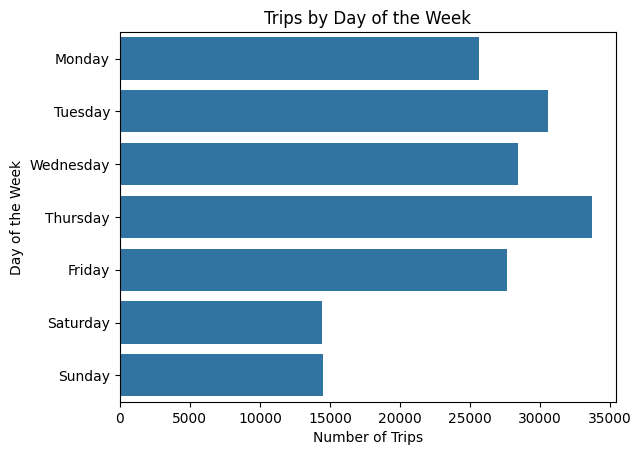

In [73]:
# Create a countplot to explore the distribution of trips by day of the week

day_order = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
# Specify the data and y-axis variable (day of the week)
sns.countplot(data=copied_data, y='Trip_day of the week', color='tab:blue', order=day_order)

# Set the title for the plot
plt.title('Trips by Day of the Week')

# Label the x-axis
plt.xlabel('Number of Trips')

# Label the y-axis
plt.ylabel('Day of the Week')

# Display the countplot
plt.show()


We notice surprisingly that the lowest number of trips are in the weekend holiday (Saturday and Sunday) while the top number of the trips is on Thursday the last working day of the week.

## Question: "How is the distribution of user ages among bike-sharing trips represented in the histogram?"

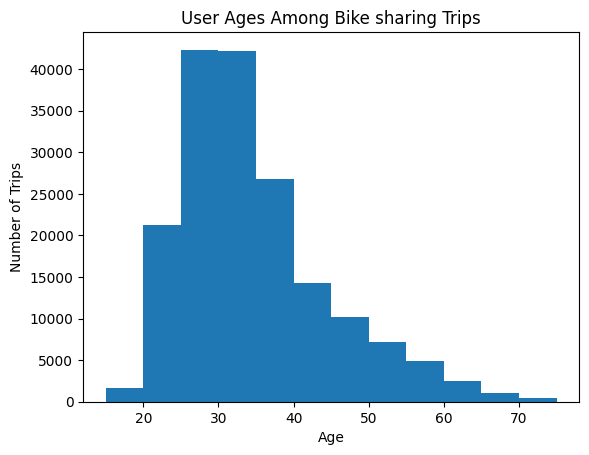

In [74]:
# Create a histogram to explore the distribution of user ages in terms of the number of trips

# Define the bins for the histogram, ranging from 15 to 80 years with 5-year intervals
bins = np.arange(15, 80, 5)

# Create the histogram using the 'user_age' variable
plt.hist(data=copied_data, x='user_age', bins=bins)

# Label the x-axis
plt.xlabel('Age')

# Label the y-axis
plt.ylabel('Number of Trips')

plt.title('User Ages Among Bike sharing Trips')
# Display the histogram
plt.show()


We notice that User with Age between 25 and 35 are making top of number of trips



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations

Regarding users :

Most users are Subscribers and Dominant gender is Male
User with Age between 25 and 35 are making top of number of trips
Regarding Trips
We will notice that most of trips are taking less than 15 mins and the top number of the trips takes about 10 mins.
The birth year with the highest frequency in the dataset is 1984
We notice surprisingly that the lowest number of trips are in the weekend holiday (Saturday and Sunday) while the top number of the trips is on Thursday the last working day of the week.

### the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this??
Yes, during the initial stages of my analysis, I encountered some challenges with the data. The dataset appeared to be untidy and required several data preprocessing steps to ensure its quality and suitability for analysis.

One of the first issues I addressed was data tidiness. I observed inconsistencies and irregularities in the dataset's structure, including missing values, duplicate entries, validity issues, and inconsistent formatting. To resolve these issues, I implemented a series of data tidying operations. These operations involved standardizing data formats, handling missing values through imputation or removal, and identifying accuracy and inconsistencies. This not only improved the overall quality of the dataset but also ensured that it adhered to a consistent and organized structure.

Another significant aspect of my data preparation involved addressing outliers. In some features, we noticed the presence of extreme values that appeared to be outliers. These outliers could potentially skew our analysis results and distort the interpretation of our findings. To mitigate this, I applied outlier detection techniques and, in some cases, chose to either remove or transform outliers to make our analysis more robust.









## Bivariate Exploration


## Question: "How do the bike-sharing trip patterns differ between customer and subscriber user types across different days of the week?"

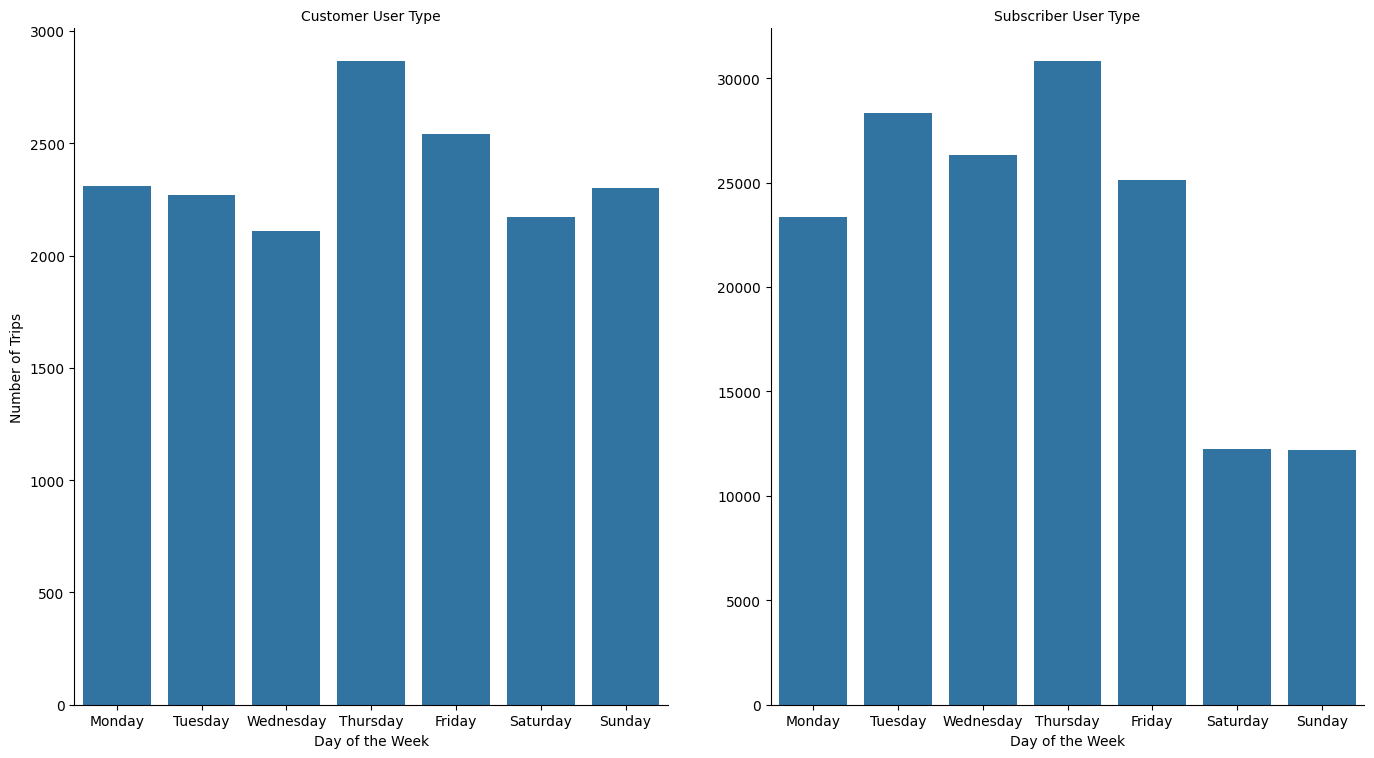

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of weekdays for the x-axis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a categorical plot (catplot) to explore the distribution of trips by user type and day of the week
g = sns.catplot(data=copied_data, x='Trip_day of the week', col="user_type", order=weekday_order, kind='count', sharey=False, color='tab:blue', height=6)

# Set plot height for better visibility
g.fig.set_size_inches(14, 8)

# Set plot titles and axis labels
g.set_axis_labels('Day of the Week', 'Number of Trips')
g.set_titles('{col_name} User Type')

# Display the plot
plt.show()



We notice that Subscribers have the lowest number of trips in the weekend holiday (Saturday and Sunday) while Customers have the lowest number of trips on Wednesday and have realtively better numbers of trips in the weekend holiday (Saturday and Sunday).

## Question: "What is the distribution of trip durations (in minutes) among different user genders in the bike-sharing dataset

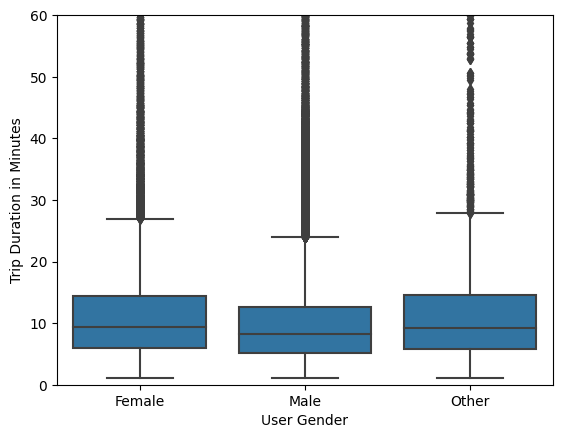

In [76]:
# Create a boxplot to explore the relationship between user gender and trip duration

# Specify the data, x-axis variable (user gender), y-axis variable (trip duration), and color
sns.boxplot(data=copied_data, x='member_gender', y='duration_min', color='tab:blue')

# Label the x-axis
plt.xlabel('User Gender')

# Label the y-axis
plt.ylabel('Trip Duration in Minutes')

# Set the y-axis limits to control the displayed range
plt.ylim(0, 60);


We notice that Males tends to have a slightly shorter trips’ duration than females

## Question: "What is the distribution of bike-sharing trips among different combinations of user types and member genders in the dataset?"

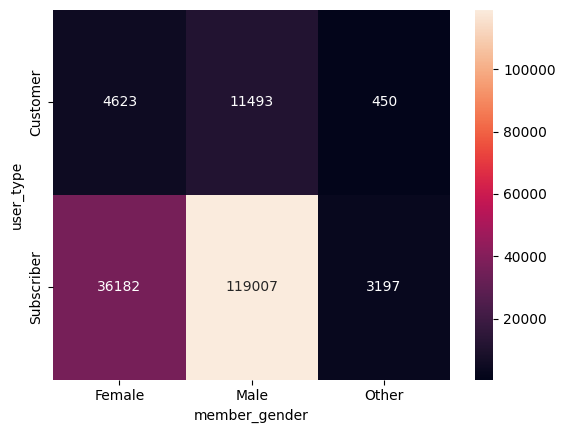

In [77]:
# Use group_by() and size() to count the number of occurrences for each combination of 'user_type' and 'member_gender'
counts = copied_data.groupby(['user_type', 'member_gender']).size()

# Reset the index of the resulting Series and name the count column
counts = counts.reset_index(name='count')

# Pivot the data to create a heatmap-friendly format
counts = counts.pivot(index='user_type', columns='member_gender', values='count')

# Create a heatmap to visualize the counts with annotations
sns.heatmap(counts, annot=True, fmt='d');


I created a heatmap to visualize the relationship between user type and member gender in the bike-sharing dataset. The highest count of users is among males who are subscribers, while the lowest count is among 'Other' gender individuals who are customers. Additionally, the dataset includes categories for 'Male,' 'Female,' 'Other,' and 'Unknown.' The 'Unknown' category represents missing or NaN values in the data.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers tends to rent bikes on working days while Customers tends to rent more in the weekend holiday (Saturday and Sunday) for longer duration.
> Subscribers tends to rent bikes for shorter duration while Customers tends to rent bikes for longer duration
>Gender Differnce does not have any effect on number of trips through the days of week.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Trip duration decreases as age increases.
> Males tends to have a slightly shorter trips’ duration than females.
>The highest count of users is among males who are subscribers, while the lowest count is among 'Other' gender individuals who are customers

## Multivariate Exploration


### Question: What insights can we gather from the scatter plot that visualizes the relationship between trip duration (in minutes) and user age, while considering different user types (customers and subscribers?

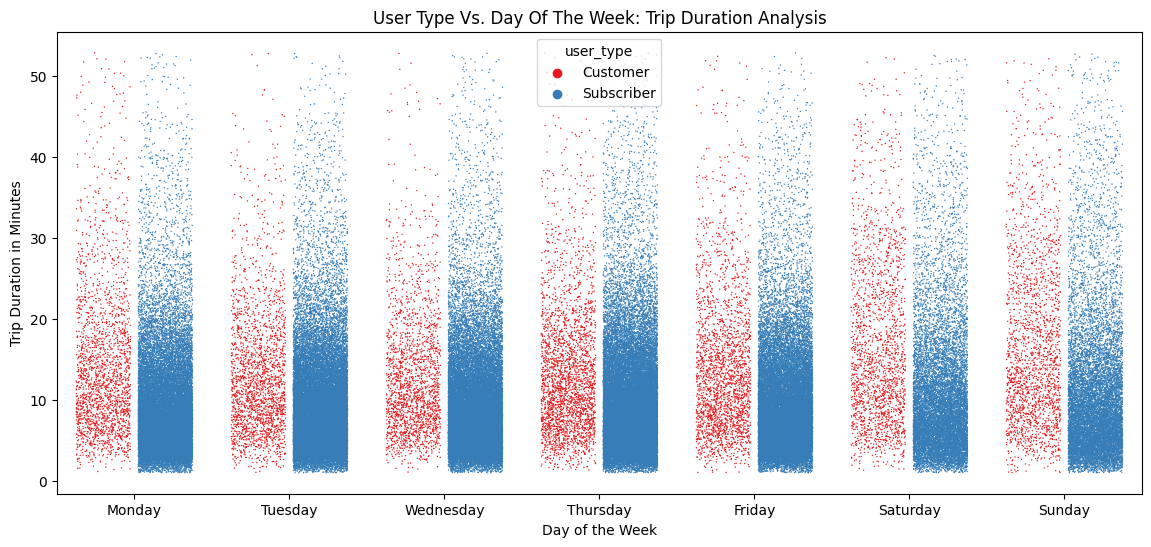

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with a specific size
plt.figure(figsize=[14, 6])

# Create a point plot to explore the relationship between the day of the week, trip duration, and user type
filtered_data = copied_data[copied_data['duration_min'] < copied_data['duration_min'].quantile(0.99)]

# Specify the data, x-axis variable (day of the week), y-axis variable (trip duration), hue (user type),
# error width (errwidth), line styles (linestyles), and marker styles (markers)
sns.stripplot(data=filtered_data, x='Trip_day of the week', y='duration_min', hue='user_type', palette = 'Set1',order=day_order, size=1, jitter=0.35, dodge=True)

# Label the x-axis
plt.xlabel('Day of the Week')

# Label the y-axis
plt.ylabel('Trip Duration in Minutes')


plt.title('User Type vs. Day of the Week: Trip Duration Analysis'.title())

plt.show()


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> after the investigation of the three variables ('Trip_day of the week','duration_min','user_type')

> We found that Both of Users type have a longer trip duration on weekend in relative to their trips during other week days and Subscribers rent bikes more efficiently as they have a shorter trip duration overall than customers.

### Were there any interesting or surprising interactions between features?

> fter the investigation of the three variables ( 'user_type', 'user_age', 'duration_min')

> We found that Both of Users type have their trips duration decreases as age increases and Subscribers of old age (60-80) have a longer trip duration and larger no of trips from customers.

## Conclusions
>There are approximately 12,000 trips taken by subscribers in this dataset. Similarly, "customer" bar is less than 2,000, it means that there are fewer than 2,000 trips taken by customers.

>Most users are Subscribers and Dominant gender is Male

>The birth year with the highest frequency in the dataset is 1984

> I noticed that most of trips are taking less than 15 mins and the top number of the trips takes about 10 mins.

>I noticed surprisingly that the lowest number of trips are in the weekend holiday (Saturday and Sunday) while the top number of the trips is on Thursday the last working day of the week.

> I noticed that User with Age between 25 and 35 are making top of number of trips

>I notice that Subscribers have the lowest number of trips in the weekend holiday (Saturday and Sunday) while Customers have the lowest number of trips on Wednesday and have realtively better numbers of trips in the weekend holiday (Saturday and Sunday).

> I notice that Males tends to have a slightly shorter trips’ duration than females

> The highest count of users is among males who are subscribers, while the lowest count is among 'Other' gender individuals who are customers. Additionally, the dataset includes categories for 'Male,' 'Female,' 'Other,' and 'Unknown.' 

>The 'Unknown' category represents missing or NaN values in the data.

>I notice that trip duration decreases as age increases.

>Both of Users type have a longer trip duration on weekend in relative to their trips during other week days. Subscribers rent bikes more efficiently as they have a shorter trip duration overall than customers. It looks like that customers rent 
bikes for entertainment and fun as they rent it for quite longer duration than subscribers specially on weekend days (Saturday and Sunday).

>Both of Users type have their trips duration decreases as age increases

In [82]:
copied_data.to_csv('copiedBike.csv', index=False)  # Set index=False to exclude row numbers as a column
